In [1]:
1+1

2

# HeatMap

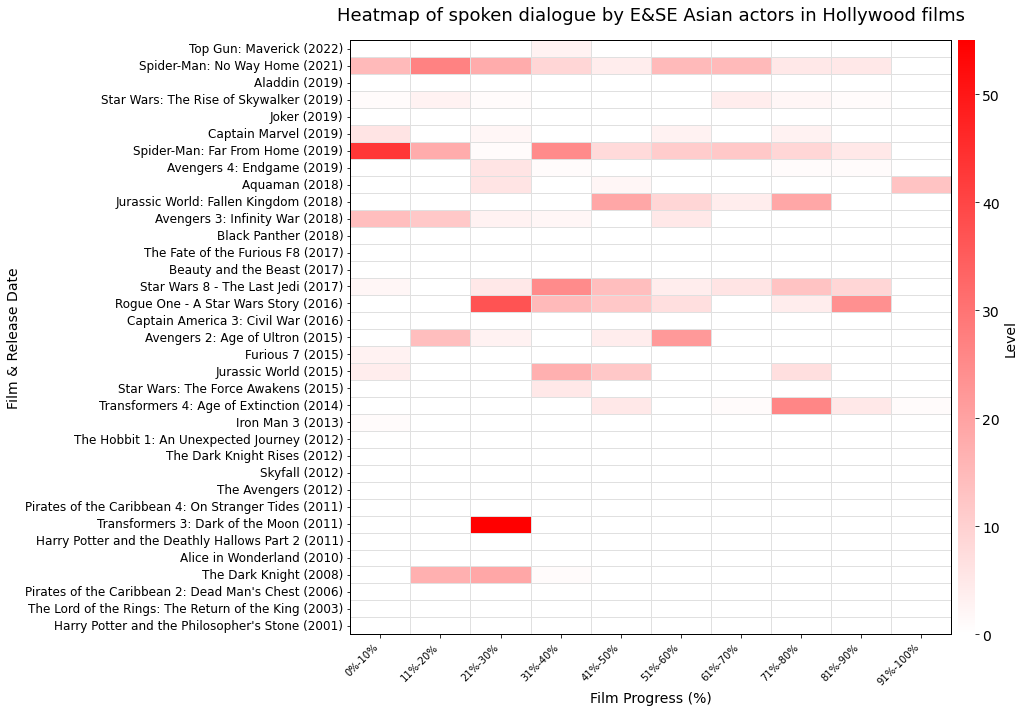

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# read data
df2 = pd.read_excel("/Users/dorothyhan/Desktop/Data Update_2026.01.13/Heatmap/DATA_Heatmap.xlsx", header=None)
percent_labels = df2.iloc[1, 1:11].tolist()
film_labels = df2.iloc[2:, 0]                            
data_matrix = df2.iloc[2:, 1:11]
data_matrix.columns = percent_labels
data_matrix.index = film_labels.astype(str)             
data_matrix = data_matrix.apply(pd.to_numeric, errors='coerce')

# define the color
white_red_cmap = LinearSegmentedColormap.from_list("white_red", ["#ffffff", "#ff0000"])

# draw
plt.figure(figsize=(15, 10))
ax = sns.heatmap(
    data_matrix,
    cmap=white_red_cmap,
    vmin=0,
    cbar_kws={'label': 'Level', 'shrink': 1, 'aspect': 35, 'pad': 0.01},
    annot=False,
    linecolor='#e0e0e0',    
    linewidths=0.5          
)


# set color bar font
colorbar = ax.collections[0].colorbar
colorbar.set_label("Level", fontsize=14)
colorbar.ax.tick_params(labelsize=14)

# add the outline
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.0)
    spine.set_color("black")   
    
plt.title("Heatmap of spoken dialogue by E&SE Asian actors in Hollywood films", fontsize=18, pad=20)
plt.xlabel("Film Progress (%)", fontsize=14)
plt.ylabel("Film & Release Date", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(fontsize=12, rotation=0)

# show the plot
plt.tight_layout()
plt.savefig("Figure 6.png",
           dpi=300,
    bbox_inches='tight')
plt.show()

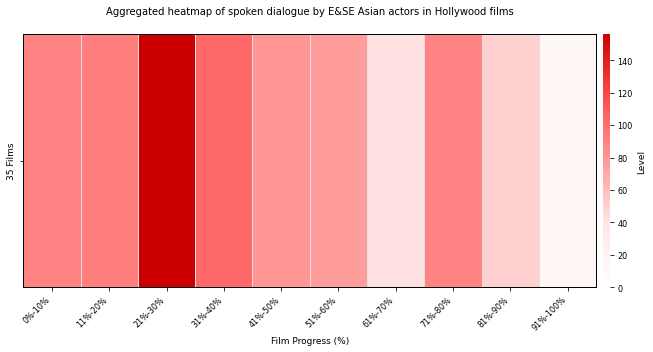

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Read the Excel data
df2 = pd.read_excel("/Users/dorothyhan/Desktop/Data Update_2026.01.13/Heatmap/DATA_Heatmap.xlsx", header=None)

# Extract time segment labels (e.g., 0%-10%, 10%-20%, etc.)
percent_labels = df2.iloc[1, 1:11].tolist()

# Extract film names
film_labels = df2.iloc[2:, 0]

# Extract data values
data_matrix = df2.iloc[2:, 1:11]
data_matrix.columns = percent_labels
data_matrix.index = film_labels.astype(str)
data_matrix = data_matrix.apply(pd.to_numeric, errors='coerce')

# Aggregate data across all films (sum or use .mean() for average)
summary_data = data_matrix.sum(axis=0).to_frame().T
summary_data.index = ['35 Films']

# Define custom colormap (white to red)
from matplotlib.colors import LinearSegmentedColormap

white_red_cmap = LinearSegmentedColormap.from_list(
    "white_red_soft",
    ["#ffffff", "#ffe6e6", "#ff9999", "#ff4d4d", "#cc0000"]
)

# Set figure size (taller Y-axis)
plt.figure(figsize=(10, 5))

# Draw heatmap
ax = sns.heatmap(
    summary_data,
    cmap=white_red_cmap,
    vmin=0,  # ensure 0 maps to white
    cbar_kws={'label': 'Level', 'shrink': 1, 'aspect': 35, 'pad': 0.01},
    annot=False,
    linecolor='#e0e0e0',
    linewidths=0.5
)

# Set colorbar font size
colorbar = ax.collections[0].colorbar
colorbar.set_label("Level", fontsize=9)
colorbar.ax.tick_params(labelsize=8)

# Set outer frame (spines)
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.0)
    spine.set_color("black")

# Set title and axis labels
plt.title("Aggregated heatmap of spoken dialogue by E&SE Asian actors in Hollywood films", fontsize=10, pad=20)
plt.xlabel("Film Progress (%)", fontsize=9)
plt.ylabel("")

# Set X-axis ticks aligned to cell centers
ax.set_xticks([i + 0.5 for i in range(len(percent_labels))])
ax.set_xticklabels(percent_labels, rotation=45, ha='right', fontsize=8)

# Set Y-axis tick (centered on the only row)
ax.set_yticks([0.5])
ax.set_yticklabels(["35 Films"], fontsize=9, rotation=90)

# show the plot
plt.tight_layout()
plt.savefig("Figure 7.png",
           dpi=300,
    bbox_inches='tight')
plt.show()